STEP 1: Load data
STEP 2: Create Bigrams
STEP 3: Perform One-hot encoding
STEP 4: Create model and train
STEP 5: Visualize results

# Loading Data

In [2]:
file = open(r'royal_data.txt')


In [3]:
royal_data = file.readlines()

In [4]:
print(royal_data[1])

Daughter is the princess



In [5]:
for idx, val in enumerate(royal_data):
    royal_data[idx] = val.lower().replace("\n","")

In [6]:
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be a king', 'a boy will be a man']


# Remove Stopwords and Tokenize

In [7]:
stopwords = ['the', 'is', 'are', 'can', 'will', 'be', 'a', 'now', 'only', 'their', 'and', 'at', 'it']



In [8]:
filter_data = []


for sentence in royal_data:
    temp = []
    for word in sentence.split(): 
        if word not in stopwords:
            temp.append(word)
    filter_data.append(temp)
       

In [9]:
filter_data

[['future', 'king', 'prince'],
 ['daughter', 'princess'],
 ['son', 'prince'],
 ['man', 'king'],
 ['woman', 'queen'],
 ['princess', 'queen'],
 ['prince', 'strong', 'man'],
 ['princess', 'beautiful', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'man']]

# Creating Bigrams

In [10]:
bigrams = []

for a_list in filter_data:
    for i in range(0,(len(a_list))-1):
        for j in range(i+1, len(a_list)):
            bigrams.append([a_list[i], a_list[j]])
            bigrams.append([a_list[j], a_list[i]])

In [11]:
bigrams

[['future', 'king'],
 ['king', 'future'],
 ['future', 'prince'],
 ['prince', 'future'],
 ['king', 'prince'],
 ['prince', 'king'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['prince', 'strong'],
 ['strong', 'prince'],
 ['prince', 'man'],
 ['man', 'prince'],
 ['strong', 'man'],
 ['man', 'strong'],
 ['princess', 'beautiful'],
 ['beautiful', 'princess'],
 ['princess', 'woman'],
 ['woman', 'princess'],
 ['beautiful', 'woman'],
 ['woman', 'beautiful'],
 ['prince', 'boy'],
 ['boy', 'prince'],
 ['prince', 'king'],
 ['king', 'prince'],
 ['boy', 'man'],
 ['man', 'boy']]

In [12]:
every_word = []

for sentence in bigrams:
    for word in sentence:    
        every_word.append(word)

In [13]:
every_word

['future',
 'king',
 'king',
 'future',
 'future',
 'prince',
 'prince',
 'future',
 'king',
 'prince',
 'prince',
 'king',
 'daughter',
 'princess',
 'princess',
 'daughter',
 'son',
 'prince',
 'prince',
 'son',
 'man',
 'king',
 'king',
 'man',
 'woman',
 'queen',
 'queen',
 'woman',
 'princess',
 'queen',
 'queen',
 'princess',
 'prince',
 'strong',
 'strong',
 'prince',
 'prince',
 'man',
 'man',
 'prince',
 'strong',
 'man',
 'man',
 'strong',
 'princess',
 'beautiful',
 'beautiful',
 'princess',
 'princess',
 'woman',
 'woman',
 'princess',
 'beautiful',
 'woman',
 'woman',
 'beautiful',
 'prince',
 'boy',
 'boy',
 'prince',
 'prince',
 'king',
 'king',
 'prince',
 'boy',
 'man',
 'man',
 'boy']

In [14]:
unique_words = set(every_word)
unique_words

{'beautiful',
 'boy',
 'daughter',
 'future',
 'king',
 'man',
 'prince',
 'princess',
 'queen',
 'son',
 'strong',
 'woman'}

In [15]:
unique_words = list(unique_words)

In [16]:
unique_words.sort()
unique_words

['beautiful',
 'boy',
 'daughter',
 'future',
 'king',
 'man',
 'prince',
 'princess',
 'queen',
 'son',
 'strong',
 'woman']

# One-hot Encoding

In [17]:
words_dict = {}

counter = 0
for word in unique_words:
    words_dict[word] = counter
    counter+=1

In [18]:
print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [19]:
import numpy as np

one_hot_data = np.zeros((len(unique_words),len(unique_words)))

In [20]:
one_hot_data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
for i in range(len(unique_words)):
    one_hot_data[i][i]= 1

In [22]:
unique_words[0]

'beautiful'

In [23]:
one_hot_dict = {}
for i in range(len(unique_words)):
    one_hot_dict[unique_words[i]] = one_hot_data[i]

for word in one_hot_dict:
    print(word, " : ", one_hot_dict[word])

beautiful  :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy  :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter  :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future  :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king  :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man  :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince  :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess  :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen  :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
print(one_hot_dict['beautiful'])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
bigrams

[['future', 'king'],
 ['king', 'future'],
 ['future', 'prince'],
 ['prince', 'future'],
 ['king', 'prince'],
 ['prince', 'king'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['man', 'king'],
 ['king', 'man'],
 ['woman', 'queen'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['prince', 'strong'],
 ['strong', 'prince'],
 ['prince', 'man'],
 ['man', 'prince'],
 ['strong', 'man'],
 ['man', 'strong'],
 ['princess', 'beautiful'],
 ['beautiful', 'princess'],
 ['princess', 'woman'],
 ['woman', 'princess'],
 ['beautiful', 'woman'],
 ['woman', 'beautiful'],
 ['prince', 'boy'],
 ['boy', 'prince'],
 ['prince', 'king'],
 ['king', 'prince'],
 ['boy', 'man'],
 ['man', 'boy']]

In [26]:
X = []
Y = []

for bi in bigrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])

In [27]:
X = np.array(X)
Y = np.array(Y)

# Creating Model

In the input layer and output layer the number of neurons will be the same.

Number of neurons will be same as the unique words, in our case 12.

Number of hidden layers will be 2, as our word embedding vector size. It will also be useful as we will be plotting a scatter plot which is a 2D graph.

The graph will help us understand whether our word embeddings are properly trained or not.

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Creating 2 variable which will help take care of any kind of size model might take

vocab_size = len(one_hot_data[0]) # Will be the length of that one-hot vector
embedding_size = 2

model = Sequential([
    
    Input(shape=(vocab_size,)), # Because that is the size of our One-hot Encoding
    Dense(embedding_size, activation= 'linear'), # Which means we do not want to use any activation function
    Dense(vocab_size, activation='Softmax') 
    
])


In [29]:

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')


In [30]:

model.fit(X,Y, epochs = 1000)

Epoch 1/1000
2/2 [==============================] - 1s 4ms/step - loss: 2.5036
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.5018
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.5003
Epoch 4/1000
2/2 [==============================] - 0s 996us/step - loss: 2.4991
Epoch 5/1000
2/2 [==============================] - 0s 4ms/step - loss: 2.4978
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4966
Epoch 7/1000
2/2 [==============================] - 0s 997us/step - loss: 2.4954
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4944
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4934
Epoch 10/1000
2/2 [==============================] - 0s 3ms/step - loss: 2.4924
Epoch 11/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4916
Epoch 12/1000
2/2 [==============================] - 0s 2ms/step - loss: 2.4906
Epoch 13/1000
2/2 [==========================

In [31]:
weights = model.get_weights()[0] # By specifying index 0, we are targetting the weights betweeen the hidden layer and output layer

weights

array([[-0.9814135 , -1.3730575 ],
       [ 0.49730125,  0.493682  ],
       [-1.1033987 , -1.038336  ],
       [ 0.70161575, -1.226123  ],
       [ 0.5804315 ,  0.4215766 ],
       [ 0.29907435, -0.4999258 ],
       [ 1.1299024 ,  0.60069025],
       [-0.7670423 ,  0.47290105],
       [-1.077144  , -0.68330574],
       [ 0.2045898 , -0.89387095],
       [-0.0142532 ,  0.64144534],
       [-0.92320144, -0.2791363 ]], dtype=float32)

The first word embeddings **[-1.4604876 , -0.07536481]** are mapped to the word **'beautiful'**

In [32]:
word_embeddings = {} #Creating this dictionary to map words to their corresponding embedding

for word in unique_words:
    word_embeddings[word] = weights[words_dict[word]]

In [33]:
for word in word_embeddings:
    print(word, " : " ,word_embeddings[word])

beautiful  :  [-0.9814135 -1.3730575]
boy  :  [0.49730125 0.493682  ]
daughter  :  [-1.1033987 -1.038336 ]
future  :  [ 0.70161575 -1.226123  ]
king  :  [0.5804315 0.4215766]
man  :  [ 0.29907435 -0.4999258 ]
prince  :  [1.1299024  0.60069025]
princess  :  [-0.7670423   0.47290105]
queen  :  [-1.077144   -0.68330574]
son  :  [ 0.2045898  -0.89387095]
strong  :  [-0.0142532   0.64144534]
woman  :  [-0.92320144 -0.2791363 ]


In [34]:
import matplotlib.pyplot as plt

In [35]:
word_embeddings

{'beautiful': array([-0.9814135, -1.3730575], dtype=float32),
 'boy': array([0.49730125, 0.493682  ], dtype=float32),
 'daughter': array([-1.1033987, -1.038336 ], dtype=float32),
 'future': array([ 0.70161575, -1.226123  ], dtype=float32),
 'king': array([0.5804315, 0.4215766], dtype=float32),
 'man': array([ 0.29907435, -0.4999258 ], dtype=float32),
 'prince': array([1.1299024 , 0.60069025], dtype=float32),
 'princess': array([-0.7670423 ,  0.47290105], dtype=float32),
 'queen': array([-1.077144  , -0.68330574], dtype=float32),
 'son': array([ 0.2045898 , -0.89387095], dtype=float32),
 'strong': array([-0.0142532 ,  0.64144534], dtype=float32),
 'woman': array([-0.92320144, -0.2791363 ], dtype=float32)}

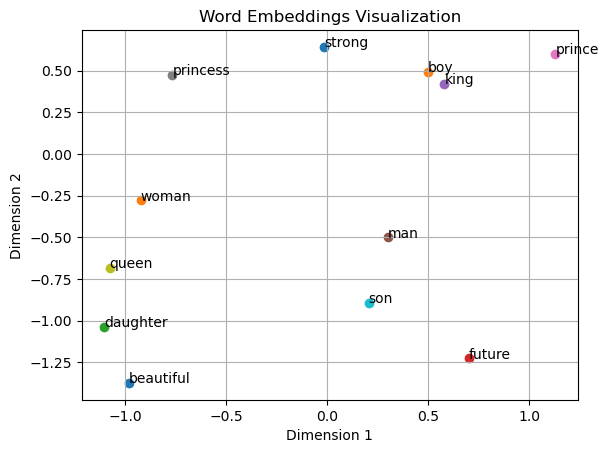

In [36]:
# Convert arrays to lists
for word, array in word_embeddings.items():
    word_embeddings[word] = list(array)

import matplotlib.pyplot as plt

for word, coord in word_embeddings.items():
    plt.scatter(coord[0], coord[1])
    plt.text(coord[0], coord[1], word)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Visualization')
plt.grid(True)
plt.show()